# Phase transition detection in 2-dimensional Ising model

Using Neural Network, we will detect the critical temperature $\beta_{cr} = 0.440686$.

In [3]:
import numpy as np
import tensorflow as tf
import keras
import pylab as plt
from numpy.linalg import solve

In [4]:
# number of configuration
!ls -l conf|grep npy|wc -l

    1900


In [5]:
# list of parameters
prm_list = [
            # beta, file_name, 
             [0.90,"conf/L32b090_"],
             [0.85,"conf/L32b085_"],
            
             [0.80,"conf/L32b080_"],
             [0.70,"conf/L32b070_"],
            
             [0.65,"conf/L32b065_"],
             [0.60,"conf/L32b060_"],
            
             [0.55,"conf/L32b055_"],
             [0.50,"conf/L32b050_"],
            
             [0.47,"conf/L32b047_"],
             [0.42,"conf/L32b042_"],
            
             [0.40,"conf/L32b040_"],
             [0.35,"conf/L32b035_"],
            
             [0.30,"conf/L32b030_"],
             [0.25,"conf/L32b025_"],
            
             [0.20,"conf/L32b020_"],
             [0.15,"conf/L32b015_"],
            
             [0.10,"conf/L32b010_"],
             [0.05,"conf/L32b005_"],
            
             [0.00,"conf/L32b000_"]
]
# beta19 x conf100 = 1900 data

Reading training data
beta=090


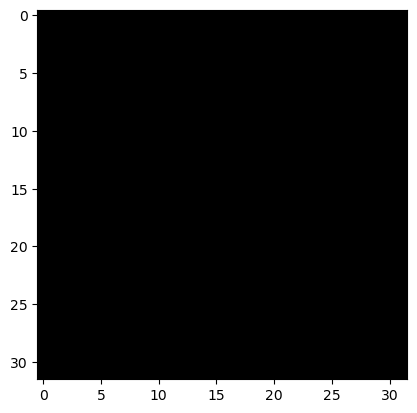

beta=085


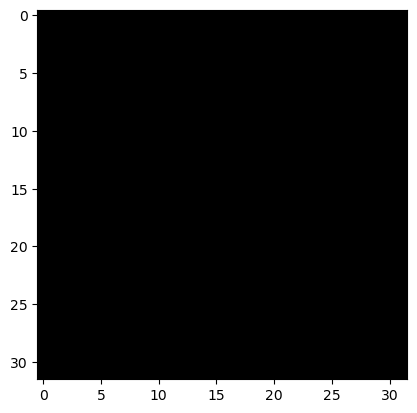

beta=080


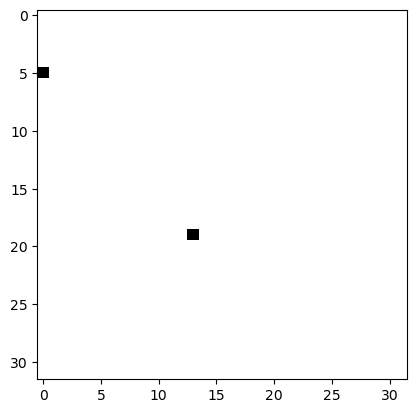

beta=070


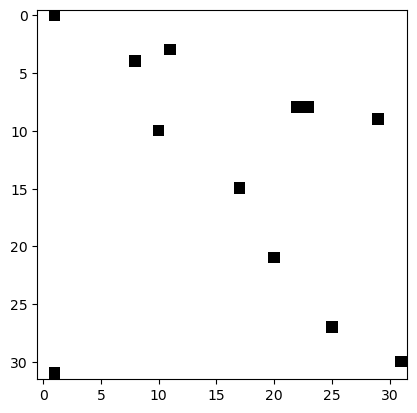

beta=065


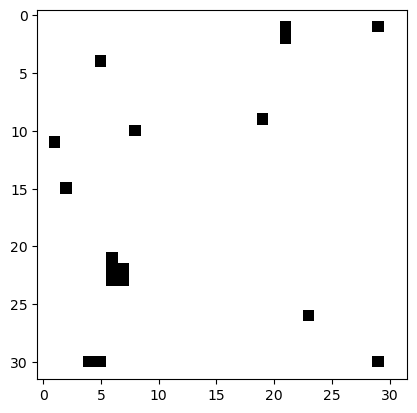

beta=060


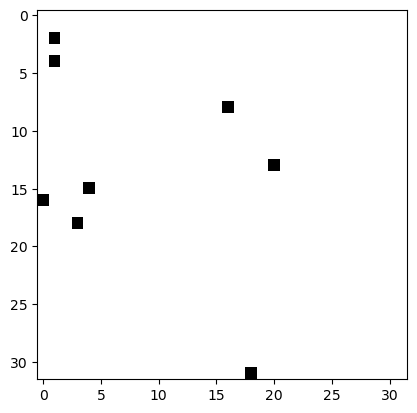

beta=055


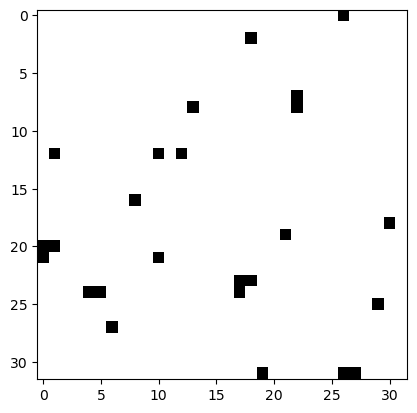

beta=050


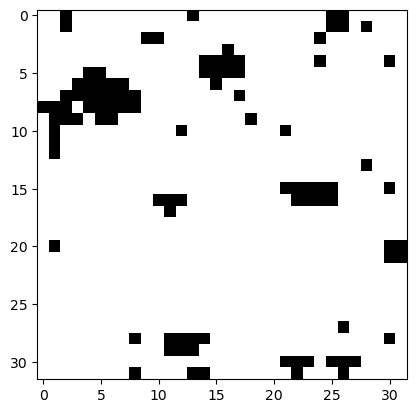

beta=047


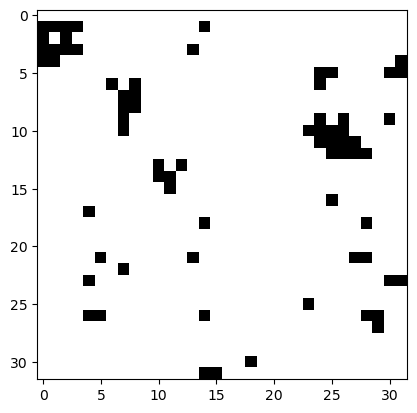

beta=042


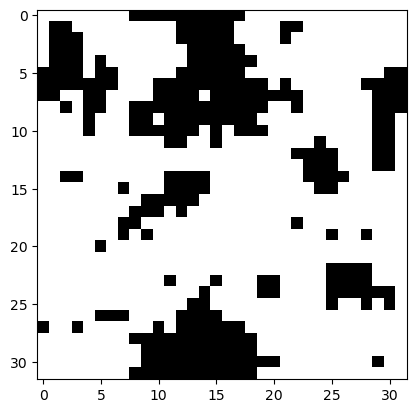

beta=040


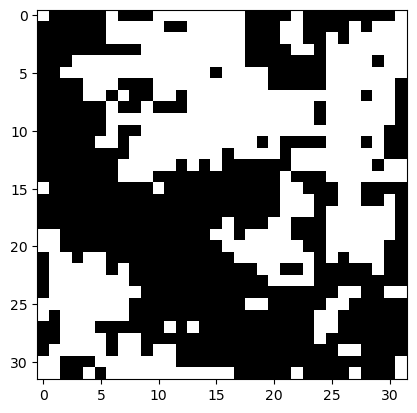

beta=035


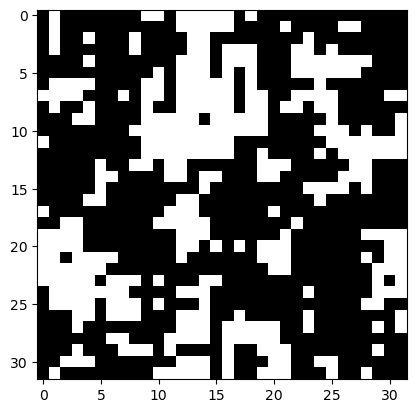

beta=030


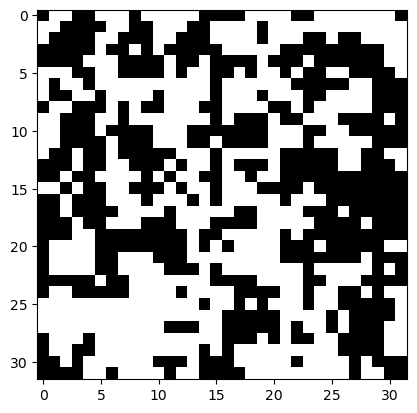

beta=025


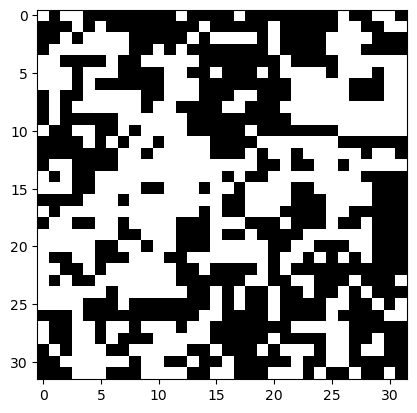

beta=020


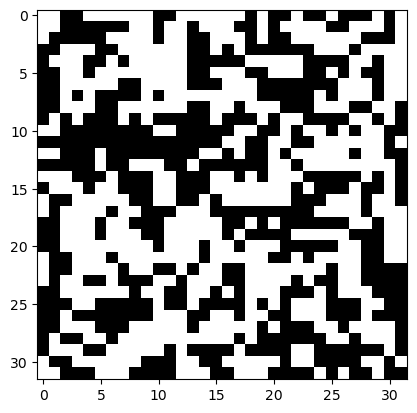

beta=015


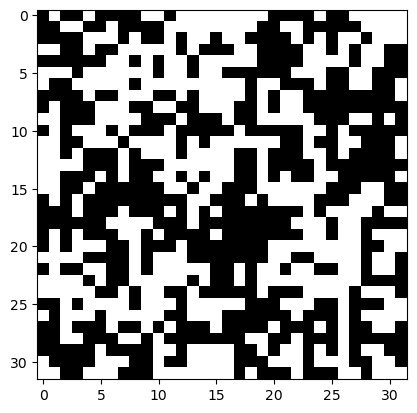

beta=010


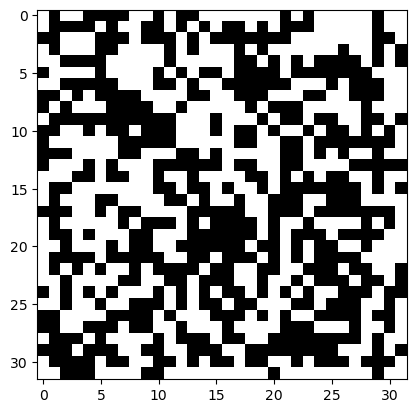

beta=005


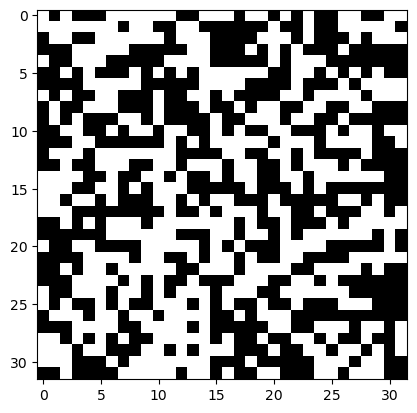

beta=000


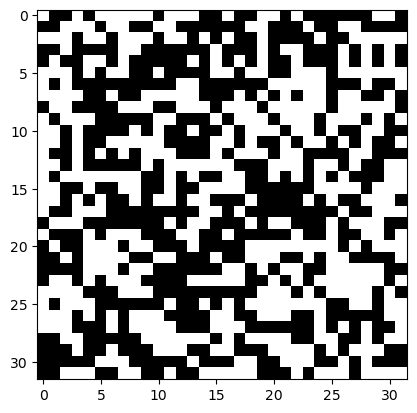

In [6]:
print("Reading training data")
for iconf in range(1):
  print("beta=090")
  file = f"conf/L32b090_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta090.pdf')
  plt.show()
for iconf in range(1):
  print("beta=085")
  file = f"conf/L32b085_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta085.pdf')
  plt.show()
for iconf in range(1):
  print("beta=080")
  file = f"conf/L32b080_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta080.pdf')
  plt.show()
for iconf in range(1):
  print("beta=070")
  file = f"conf/L32b070_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta070.pdf')
  plt.show()
for iconf in range(1):
  print("beta=065")
  file = f"conf/L32b065_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta065.pdf')
  plt.show()
for iconf in range(1):
  print("beta=060")
  file = f"conf/L32b060_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta060.pdf')
  plt.show()
for iconf in range(1):
  print("beta=055")
  file = f"conf/L32b055_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta055.pdf')
  plt.show()
for iconf in range(1):
  print("beta=050")
  file = f"conf/L32b050_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta050.pdf')
  plt.show()
for iconf in range(1):
  print("beta=047")
  file = f"conf/L32b047_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta047.pdf')
  plt.show()
for iconf in range(1):
  print("beta=042")
  file = f"conf/L32b042_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta042.pdf')
  plt.show()
for iconf in range(1):
  print("beta=040")
  file = f"conf/L32b040_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta040.pdf')
  plt.show()
for iconf in range(1):
  print("beta=035")
  file = f"conf/L32b035_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta035.pdf')
  plt.show()
for iconf in range(1):
  print("beta=030")
  file = f"conf/L32b030_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta030.pdf')
  plt.show()
for iconf in range(1):
  print("beta=025")
  file = f"conf/L32b025_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta025.pdf')
  plt.show()
for iconf in range(1):
  print("beta=020")
  file = f"conf/L32b020_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta020.pdf')
  plt.show()
for iconf in range(1):
  print("beta=015")
  file = f"conf/L32b015_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta015.pdf')
  plt.show()
for iconf in range(1):
  print("beta=010")
  file = f"conf/L32b010_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta010.pdf')
  plt.show()
for iconf in range(1):
  print("beta=005")
  file = f"conf/L32b005_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta005.pdf')
  plt.show()
for iconf in range(1):
  print("beta=000")
  file = f"conf/L32b000_{iconf}.npy"
  sc = np.load(file)
  plt.imshow(sc, cmap='gray')
  plt.savefig('figures/beta000.pdf')
  plt.show()

# Feature labeling and data separation

In [7]:
nconf = 100 # The number of configurations per beta
betacr = 0.440686 # critical temperature for 2d Ising model
#
data = []
labels = []
betas = []
nprm=len(prm_list)
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  fname = prm_list[ibeta][1]
  for itrj in range(nconf):
    npsc = np.load(f"{fname}{itrj}.npy")
    data.append(npsc)
    if beta > betacr:
      labels.append([0,1])
    else:
      labels.append([1,0])
    betas.append(beta)
data = np.array(data)
labels = np.array(labels)
#
train_data=data[0::2]
train_labels=labels[0::2]
train_betas=betas[0::2] # this will not be used in training
#
val_data=data[1::2]
val_labels=labels[1::2]
val_betas=betas[1::2]
#
# beta18 x conf100 = 1800 data
# beta18 x conf50 = 900 training_data(18x50,same beta = 50) + 900 val_data

In [8]:
print("train_data.shape = ", train_data.shape)
print("val_data.shape = ", val_data.shape)

train_data.shape =  (950, 32, 32)
val_data.shape =  (950, 32, 32)


## Model Definition

In [9]:
tf.random.set_seed(12345)
model_FC = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

/Users/koichiro/miniforge3/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model_FC.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,902 (480.09 KB)

 Trainable params: 122,902 (480.09 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_FC.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

0.9 0.8674933 0.13250667
0.85 0.86691594 0.13308401
0.8 0.86858046 0.13141948
0.7 0.8637518 0.1362481
0.65 0.8560436 0.14395644
0.6 0.8466157 0.15338433
0.55 0.8596989 0.14030117
0.5 0.83190966 0.16809034
0.47 0.82154435 0.17845564
0.42 0.66358304 0.33641702
0.4 0.6632654 0.33673453
0.35 0.6172153 0.38278475
0.3 0.6602126 0.3397874
0.25 0.64120895 0.35879096
0.2 0.64984876 0.3501512
0.15 0.64976746 0.35023257
0.1 0.62103605 0.37896398
0.05 0.6624459 0.337554
0.0 0.6376181 0.36238185


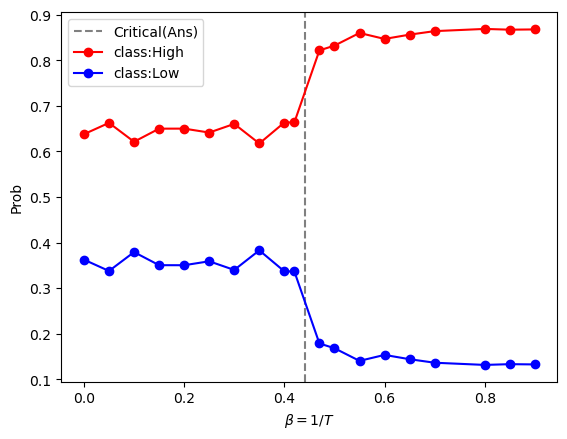

In [12]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_FC(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x)
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical(Ans)")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.savefig('figures/beforeTraining.pdf')
plt.show()

In [13]:
model_FC.fit(train_data, train_labels, epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8985 - loss: 0.2672
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 1.0000 - loss: 0.0043
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 1.0000 - loss: 5.7128e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 1.0000 - loss: 1.6586e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 1.0000 - loss: 8.4764e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 1.0000 - loss: 6.8317e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 1.0000 - loss: 5.7217e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 1.0000 - loss: 4.8381e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 1.0000 - loss: 4.1285e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 1.0000 - loss: 3.5543e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 1.0000 - loss: 3.0650e-05
Epoch

0.9 3.1468424e-08 1.0
0.85 3.2907884e-08 1.0
0.8 3.3481985e-08 1.0
0.7 3.8460442e-08 1.0
0.65 4.5187832e-08 1.0
0.6 5.5309837e-08 1.0
0.55 1.0597102e-07 0.9999998
0.5 4.962608e-07 0.9999995
0.47 1.0049553e-05 0.99998987
0.42 0.95284575 0.047154207
0.4 0.9867616 0.013238354
0.35 0.9999995 4.259305e-07
0.3 1.0 2.4632762e-08
0.25 0.9999988 1.219562e-06
0.2 0.9999991 9.145322e-07
0.15 0.9999998 1.7227202e-07
0.1 0.99999994 6.856735e-08
0.05 0.9999998 1.9156107e-07
0.0 0.9999998 1.3192206e-07


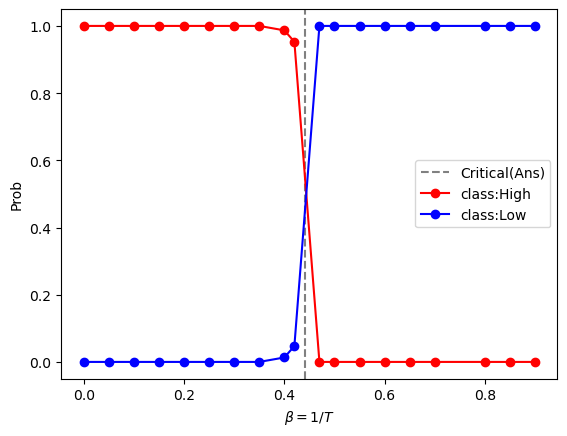

In [14]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_FC(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x)
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical(Ans)")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.savefig('figures/result.pdf')
plt.show()

0.9 3.1468424e-08 1.0
0.85 3.2907884e-08 1.0
0.8 3.3481985e-08 1.0
0.7 3.8460442e-08 1.0
0.65 4.5187832e-08 1.0
0.6 5.5309837e-08 1.0
0.55 1.0597102e-07 0.9999998
0.5 4.962608e-07 0.9999995
0.47 1.0049553e-05 0.99998987
0.42 0.95284575 0.047154207
0.4 0.9867616 0.013238354
0.35 0.9999995 4.259305e-07
0.3 1.0 2.4632762e-08
0.25 0.9999988 1.219562e-06
0.2 0.9999991 9.145322e-07
0.15 0.9999998 1.7227202e-07
0.1 0.99999994 6.856735e-08
0.05 0.9999998 1.9156107e-07
0.0 0.9999998 1.3192206e-07


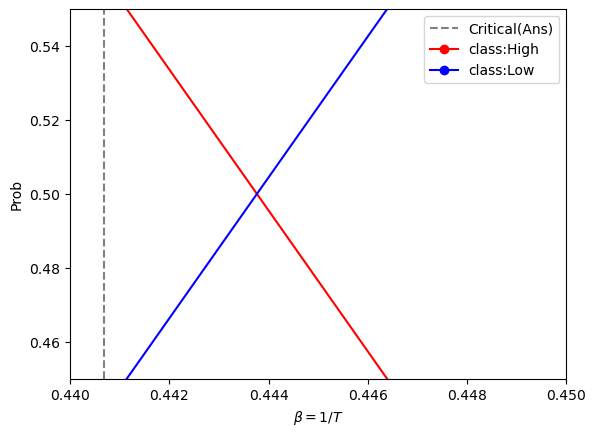

In [15]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_FC(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x)
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical(Ans)")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.xlim(0.44, 0.45)
plt.ylim(0.45, 0.55)
plt.savefig('figures/resultCloseUp.pdf')
plt.show()

0.42 0.95284575
0.47 1.0049553e-05
0.42 0.047154207
0.47 0.99998987
sol x,y =  [0.49999998 0.44376306]


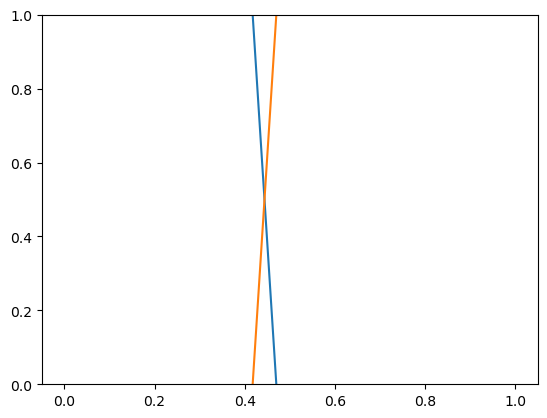

Relative error = 0.7 %


In [16]:
# Calculating intersection
u1,v1 = xs[9],y1s[9]
u2,v2 = xs[8],y1s[8]
w1,t1 = xs[9],y2s[9]
w2,t2 = xs[8],y2s[8]
print(u1,v1)
print(u2,v2)
#
print(w1,t1)
print(w2,t2)

tan1=(v2-v1)/(u2-u1)
tan2=(t2-t1)/(w2-w1)
MatA = [[1, -tan1],
        [1, -tan2]]
 
vecB = [v1-tan1*u1,
        t1-tan2*w1]
#
sol = solve(MatA, vecB)
print("sol x,y = ", sol)
#
xx = np.linspace(0,1)
yy = tan1*(xx-u1)+v1
plt.plot(xx,yy)
#
yy = tan2*(xx-w1)+t1
plt.plot(xx, yy)
plt.ylim(0,1)
plt.show()
#
beta_cr = 0.440686
er = round(abs(beta_cr - sol[1])/beta_cr  *100,2)
print(f"Relative error = {er} %")

# Convolutional neural network

CNN

In [ ]:
tf.random.set_seed(12345)
model_CNN = keras.Sequential([
    keras.layers.Conv2D(filters =  1,
                        kernel_size=(4, 4), 
                        activation='relu', 
                        input_shape=(32, 32, 1) 
                        ),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model_CNN.summary()

In [16]:
model_CNN.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-3), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_data_cnn=np.array(train_data)
train_data_cnn = train_data_cnn.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
train_data_cnn.shape

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = "model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10),
]

model_CNN.fit(
    train_data_cnn,
    train_labels,
    epochs = 1000,
    validation_split = 0.15,
    callbacks = callbacks,
)

In [ ]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950
Nsameclass = 50
for ii in range(0,Ndatamax,Nsameclass):
  res = model_CNN(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] )
  y2=np.mean(res.numpy().T[1] )
  xs.append( x )
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

In [ ]:
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical")
plt.plot(xs,y1s,label="class:High",marker="o",color="red")
plt.plot(xs,y2s,label="class:Low",marker="o",color="blue")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.xlim(0.44, 0.45)
plt.ylim(0.45, 0.55)
plt.show()

In [ ]:
u1,v1 = xs[9],y1s[9]
u2,v2 = xs[8],y1s[8]
w1,t1 = xs[9],y2s[9]
w2,t2 = xs[8],y2s[8]
print(u1,v1)
print(u2,v2)
#
print(w1,t1)
print(w2,t2)

from numpy.linalg import solve

tan1=(v2-v1)/(u2-u1)
tan2=(t2-t1)/(w2-w1)
MatA = [[1, -tan1],
        [1, -tan2]]
 
vecB = [v1-tan1*u1,
        t1-tan2*w1]
#
sol = solve(MatA, vecB)
print("sol x,y = ", sol)
#
xx = np.linspace(0,1)
yy = tan1*(xx-u1)+v1
plt.plot(xx,yy)
#
yy = tan2*(xx-w1)+t1
plt.plot(xx, yy)
plt.ylim(0,1)
plt.show()
#
beta_cr = 0.440686
er = round(abs(beta_cr - sol[1])/beta_cr  *100,2)
print(f"Relative error = {er} %")